Assignment-7-Clustering-Crime data

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df=pd.read_csv('/content/crime_data.csv')

In [ ]:
df


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## EDA & Data Processing

In [ ]:
df=df.rename({'Unnamed: 0':'State'}, axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        50 non-null     object 
 1   Murder       50 non-null     float64
 2   Assault      50 non-null     int64  
 3   UrbanPop     50 non-null     int64  
 4   Rape         50 non-null     float64
 5   h_clusterid  50 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 2.5+ KB


In [ ]:
df.isna().sum()

State          0
Murder         0
Assault        0
UrbanPop       0
Rape           0
h_clusterid    0
dtype: int64

## Agglomerative Clustering

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing Dataset

scaler = MinMaxScaler()

scaler_df = scaler.fit_transform(df.iloc[:,1:])
print(scaler_df)

[[0.74698795 0.65410959 0.44067797 0.35917313 0.        ]
 [0.55421687 0.74657534 0.27118644 0.96124031 0.        ]
 [0.43975904 0.85273973 0.81355932 0.6124031  0.        ]
 [0.48192771 0.49657534 0.30508475 0.31524548 0.5       ]
 [0.4939759  0.79109589 1.         0.86046512 0.        ]
 [0.42771084 0.54452055 0.77966102 0.81136951 0.        ]
 [0.15060241 0.22260274 0.76271186 0.09819121 0.5       ]
 [0.30722892 0.6609589  0.6779661  0.21963824 0.5       ]
 [0.87951807 0.99315068 0.81355932 0.63565891 0.        ]
 [1.         0.56849315 0.47457627 0.47803618 0.        ]
 [0.27108434 0.00342466 0.86440678 0.33333333 0.5       ]
 [0.10843373 0.25684932 0.37288136 0.17829457 1.        ]
 [0.57831325 0.69863014 0.86440678 0.43152455 0.        ]
 [0.38554217 0.23287671 0.55932203 0.35400517 0.5       ]
 [0.08433735 0.03767123 0.42372881 0.10335917 1.        ]
 [0.31325301 0.23972603 0.57627119 0.27648579 0.5       ]
 [0.53614458 0.21917808 0.33898305 0.23255814 0.5       ]
 [0.87951807 0

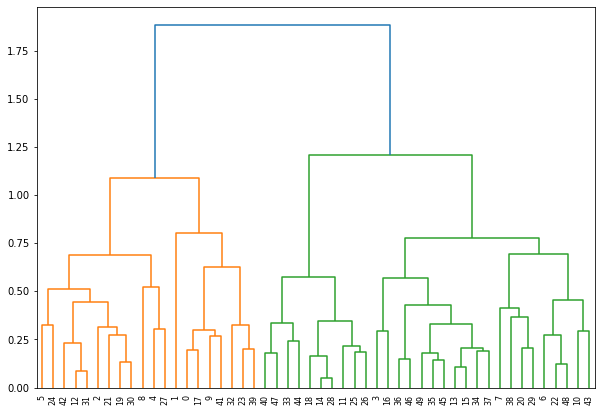

In [ ]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler_df,'complete'))

In [ ]:
# Creating clusters
H_clusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=4)

In [ ]:
# Using data normalized by MinMaxScaler 
y=pd.DataFrame(H_clusters.fit_predict(scaler_df),columns=['clustersid'])
y['clustersid'].value_counts()

0    20
1    13
2    10
3     7
Name: clustersid, dtype: int64

In [ ]:
# Adding clusters to dataset
df['clustersid_HC']=H_clusters.labels_
df

,State,Murder,Assault,UrbanPop,Rape,h_clusterid,clustersid_HC
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,0,1
5,Colorado,7.9,204,78,38.7,0,1
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,0,1
9,Georgia,17.4,211,60,25.8,0,3


In [ ]:
df.groupby('clustersid_HC').agg(['mean']).reset_index()

,clustersid_HC,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,5.715000,132.300000,70.800000,18.100000,1.0
1,1,10.815385,257.384615,76.000000,33.192308,0.0
2,2,3.180000,78.700000,49.300000,11.630000,2.0
3,3,14.671429,251.285714,54.285714,21.685714,0.0


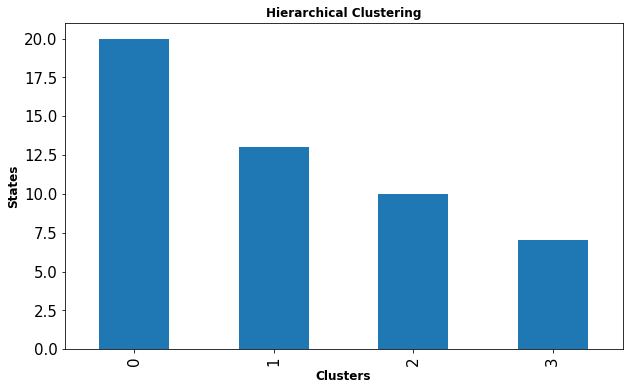

In [ ]:
# Plotting barplot using groupby method to get visualization of how states in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['clustersid_HC']).count()['State'].plot(kind='bar')
plt.ylabel('States')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
sil_score= silhouette_score(scaler_df, H_clusters.labels_)
sil_score

0.441518150304727

In [ ]:
# States in cluster #0 
df[df['clustersid_HC']==0]

,State,Murder,Assault,UrbanPop,Rape,h_clusterid,clustersid_HC
3,Arkansas,8.8,190,50,19.5,1,0
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
10,Hawaii,5.3,46,83,20.2,1,0
13,Indiana,7.2,113,65,21.0,1,0
15,Kansas,6.0,115,66,18.0,1,0
16,Kentucky,9.7,109,52,16.3,1,0
20,Massachusetts,4.4,149,85,16.3,1,0
22,Minnesota,2.7,72,66,14.9,1,0
29,New Jersey,7.4,159,89,18.8,1,0


In [ ]:
# States in cluster #1 
df[df['clustersid_HC']==1]

,State,Murder,Assault,UrbanPop,Rape,h_clusterid,clustersid_HC
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,0,1
4,California,9.0,276,91,40.6,0,1
5,Colorado,7.9,204,78,38.7,0,1
8,Florida,15.4,335,80,31.9,0,1
12,Illinois,10.4,249,83,24.0,0,1
19,Maryland,11.3,300,67,27.8,0,1
21,Michigan,12.1,255,74,35.1,0,1
24,Missouri,9.0,178,70,28.2,0,1
27,Nevada,12.2,252,81,46.0,0,1


In [ ]:
# States in cluster #2 
df[df['clustersid_HC']==2]

,State,Murder,Assault,UrbanPop,Rape,h_clusterid,clustersid_HC
11,Idaho,2.6,120,54,14.2,2,2
14,Iowa,2.2,56,57,11.3,2,2
18,Maine,2.1,83,51,7.8,2,2
25,Montana,6.0,109,53,16.4,2,2
26,Nebraska,4.3,102,62,16.5,2,2
28,New Hampshire,2.1,57,56,9.5,2,2
33,North Dakota,0.8,45,44,7.3,2,2
40,South Dakota,3.8,86,45,12.8,2,2
44,Vermont,2.2,48,32,11.2,2,2
47,West Virginia,5.7,81,39,9.3,2,2


In [ ]:
# States in cluster #3 
df[df['clustersid_HC']==3]

,State,Murder,Assault,UrbanPop,Rape,h_clusterid,clustersid_HC
0,Alabama,13.2,236,58,21.2,0,3
9,Georgia,17.4,211,60,25.8,0,3
17,Louisiana,15.4,249,66,22.2,0,3
23,Mississippi,16.1,259,44,17.1,0,3
32,North Carolina,13.0,337,45,16.1,0,3
39,South Carolina,14.4,279,48,22.5,0,3
41,Tennessee,13.2,188,59,26.9,0,3


## K-MEANS Clustering

In [ ]:
# Import Library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

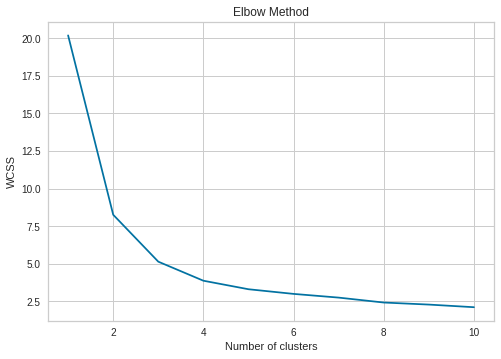

In [ ]:
# Using data normalized by MinMaxScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## From above Scree plot, optimum number of clusters can be selected equal to 4

In [ ]:
#Build Cluster algorithm

KM_clusters = KMeans(4, random_state=42)
KM_clusters.fit(scaler_df)

KMeans(n_clusters=4, random_state=42)

In [ ]:
y=pd.DataFrame(KM_clusters.fit_predict(scaler_df),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

2    20
0    13
1    10
3     7
Name: clusterid_Kmeans, dtype: int64

In [ ]:
#Assign clusters to the data set
df['clusterid_Kmeans'] = KM_clusters.labels_
df

,State,Murder,Assault,UrbanPop,Rape,h_clusterid,clustersid_HC,clusterid_Kmeans
0,Alabama,13.2,236,58,21.2,0,3,3
1,Alaska,10.0,263,48,44.5,0,1,0
2,Arizona,8.1,294,80,31.0,0,1,0
3,Arkansas,8.8,190,50,19.5,1,0,2
4,California,9.0,276,91,40.6,0,1,0
5,Colorado,7.9,204,78,38.7,0,1,0
6,Connecticut,3.3,110,77,11.1,1,0,2
7,Delaware,5.9,238,72,15.8,1,0,2
8,Florida,15.4,335,80,31.9,0,1,0
9,Georgia,17.4,211,60,25.8,0,3,3


In [ ]:
df.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Murder,Assault,UrbanPop,Rape,h_clusterid,clustersid_HC
,,mean,mean,mean,mean,mean,mean
0,0,10.815385,257.384615,76.000000,33.192308,0.0,1.0
1,1,3.180000,78.700000,49.300000,11.630000,2.0,2.0
2,2,5.715000,132.300000,70.800000,18.100000,1.0,0.0
3,3,14.671429,251.285714,54.285714,21.685714,0.0,3.0


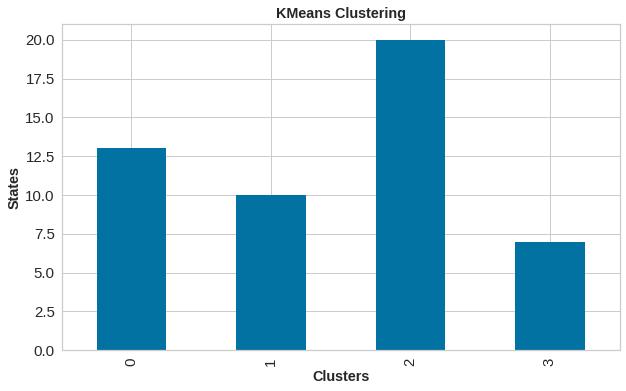

In [ ]:
# Plotting barplot using groupby method to get visualization of how states in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['clusterid_Kmeans']).count()['State'].plot(kind='bar')
plt.ylabel('States')
plt.title('KMeans Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
# States in cluster #0 
df[df['clusterid_Kmeans']==0]

,State,Murder,Assault,UrbanPop,Rape,h_clusterid,clustersid_HC,clusterid_Kmeans
1,Alaska,10.0,263,48,44.5,0,1,0
2,Arizona,8.1,294,80,31.0,0,1,0
4,California,9.0,276,91,40.6,0,1,0
5,Colorado,7.9,204,78,38.7,0,1,0
8,Florida,15.4,335,80,31.9,0,1,0
12,Illinois,10.4,249,83,24.0,0,1,0
19,Maryland,11.3,300,67,27.8,0,1,0
21,Michigan,12.1,255,74,35.1,0,1,0
24,Missouri,9.0,178,70,28.2,0,1,0
27,Nevada,12.2,252,81,46.0,0,1,0


In [ ]:
# States in cluster #1 
df[df['clusterid_Kmeans']==1]

,State,Murder,Assault,UrbanPop,Rape,h_clusterid,clustersid_HC,clusterid_Kmeans
11,Idaho,2.6,120,54,14.2,2,2,1
14,Iowa,2.2,56,57,11.3,2,2,1
18,Maine,2.1,83,51,7.8,2,2,1
25,Montana,6.0,109,53,16.4,2,2,1
26,Nebraska,4.3,102,62,16.5,2,2,1
28,New Hampshire,2.1,57,56,9.5,2,2,1
33,North Dakota,0.8,45,44,7.3,2,2,1
40,South Dakota,3.8,86,45,12.8,2,2,1
44,Vermont,2.2,48,32,11.2,2,2,1
47,West Virginia,5.7,81,39,9.3,2,2,1


In [ ]:
# States in cluster #2 
df[df['clusterid_Kmeans']==2]

,State,Murder,Assault,UrbanPop,Rape,h_clusterid,clustersid_HC,clusterid_Kmeans
3,Arkansas,8.8,190,50,19.5,1,0,2
6,Connecticut,3.3,110,77,11.1,1,0,2
7,Delaware,5.9,238,72,15.8,1,0,2
10,Hawaii,5.3,46,83,20.2,1,0,2
13,Indiana,7.2,113,65,21.0,1,0,2
15,Kansas,6.0,115,66,18.0,1,0,2
16,Kentucky,9.7,109,52,16.3,1,0,2
20,Massachusetts,4.4,149,85,16.3,1,0,2
22,Minnesota,2.7,72,66,14.9,1,0,2
29,New Jersey,7.4,159,89,18.8,1,0,2


In [ ]:
# States in cluster #1 
df[df['clusterid_Kmeans']==2]

,State,Murder,Assault,UrbanPop,Rape,h_clusterid,clustersid_HC,clusterid_Kmeans
3,Arkansas,8.8,190,50,19.5,1,0,2
6,Connecticut,3.3,110,77,11.1,1,0,2
7,Delaware,5.9,238,72,15.8,1,0,2
10,Hawaii,5.3,46,83,20.2,1,0,2
13,Indiana,7.2,113,65,21.0,1,0,2
15,Kansas,6.0,115,66,18.0,1,0,2
16,Kentucky,9.7,109,52,16.3,1,0,2
20,Massachusetts,4.4,149,85,16.3,1,0,2
22,Minnesota,2.7,72,66,14.9,1,0,2
29,New Jersey,7.4,159,89,18.8,1,0,2


## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# We will try for different values of eps and mn_samples

In [ ]:
EPS = [0.22, 0.24, 0.26,0.28, 0.30]

for n in EPS:
    dbscan = DBSCAN(eps=n, min_samples=4)
    dbscan.fit(scaler_df)
    y=pd.DataFrame(dbscan.fit_predict(scaler_df),columns=['clusterid_DBSCAN'])
    print(f'For eps = {n}','\n',y['clusterid_DBSCAN'].value_counts())
    # silhouette score
    sil_score= silhouette_score(scaler_df, dbscan.labels_)
    print(f'For eps silhouette score = {n}','\n', sil_score)

For eps = 0.22 
 -1    34
 0     9
 1     7
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.22 
 0.11881833138218367
For eps = 0.24 
 -1    25
 1     9
 2     8
 0     4
 3     4
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.24 
 0.04751484153190586
For eps = 0.26 
 -1    20
 1    16
 2    10
 0     4
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.26 
 0.23073863043521636
For eps = 0.28 
  2    17
-1    10
 3    10
 1     7
 0     6
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.28 
 0.3071311159799947
For eps = 0.3 
  2    19
 3    10
 1     8
 0     7
-1     6
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.3 
 0.3733212133334757


When we have value of epsilon = 0.28, we are getting 3 clusters silhouette score is more as compared to other dbscan models.


    -1 shows the noisy data points

In [ ]:
dbscan = DBSCAN(eps=0.28, min_samples=4)
dbscan.fit(scaler_df)

DBSCAN(eps=0.28, min_samples=4)

In [ ]:
df['clusterid_DBSCAN'] = dbscan.labels_
df.head()

,State,Murder,Assault,UrbanPop,Rape,h_clusterid,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
0,Alabama,13.2,236,58,21.2,0,3,3,0
1,Alaska,10.0,263,48,44.5,0,1,0,-1
2,Arizona,8.1,294,80,31.0,0,1,0,1
3,Arkansas,8.8,190,50,19.5,1,0,2,2
4,California,9.0,276,91,40.6,0,1,0,-1


In [ ]:
df.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,Murder,Assault,UrbanPop,Rape,h_clusterid,clustersid_HC,clusterid_Kmeans
,,mean,mean,mean,mean,mean,mean,mean
0,-1,10.180000,211.200000,71.500000,30.800000,0.3,0.9,0.9
1,0,14.216667,258.000000,53.333333,21.000000,0.0,3.0,3.0
2,1,11.014286,262.571429,77.142857,28.800000,0.0,1.0,0.0
3,2,5.494118,132.529412,71.117647,18.217647,1.0,0.0,2.0
4,3,3.180000,78.700000,49.300000,11.630000,2.0,2.0,1.0


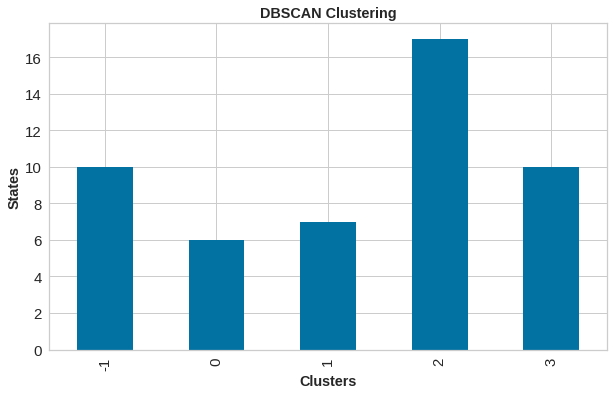

In [ ]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['clusterid_DBSCAN']).count()['State'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
# States in cluster #0 
df[df['clusterid_DBSCAN']==0]

,State,Murder,Assault,UrbanPop,Rape,h_clusterid,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
0,Alabama,13.2,236,58,21.2,0,3,3,0
17,Louisiana,15.4,249,66,22.2,0,3,3,0
23,Mississippi,16.1,259,44,17.1,0,3,3,0
32,North Carolina,13.0,337,45,16.1,0,3,3,0
39,South Carolina,14.4,279,48,22.5,0,3,3,0
41,Tennessee,13.2,188,59,26.9,0,3,3,0


In [ ]:
# States in cluster #1 
df[df['clusterid_DBSCAN']==1]

,State,Murder,Assault,UrbanPop,Rape,h_clusterid,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
2,Arizona,8.1,294,80,31.0,0,1,0,1
12,Illinois,10.4,249,83,24.0,0,1,0,1
19,Maryland,11.3,300,67,27.8,0,1,0,1
21,Michigan,12.1,255,74,35.1,0,1,0,1
30,New Mexico,11.4,285,70,32.1,0,1,0,1
31,New York,11.1,254,86,26.1,0,1,0,1
42,Texas,12.7,201,80,25.5,0,1,0,1


In [ ]:
# States in cluster #2 
df[df['clusterid_DBSCAN']==2]

,State,Murder,Assault,UrbanPop,Rape,h_clusterid,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
3,Arkansas,8.8,190,50,19.5,1,0,2,2
6,Connecticut,3.3,110,77,11.1,1,0,2,2
13,Indiana,7.2,113,65,21.0,1,0,2,2
15,Kansas,6.0,115,66,18.0,1,0,2,2
20,Massachusetts,4.4,149,85,16.3,1,0,2,2
22,Minnesota,2.7,72,66,14.9,1,0,2,2
29,New Jersey,7.4,159,89,18.8,1,0,2,2
34,Ohio,7.3,120,75,21.4,1,0,2,2
35,Oklahoma,6.6,151,68,20.0,1,0,2,2
36,Oregon,4.9,159,67,29.3,1,0,2,2


In [ ]:
# States in cluster #1 
df[df['clusterid_DBSCAN']==-1]

,State,Murder,Assault,UrbanPop,Rape,h_clusterid,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
1,Alaska,10.0,263,48,44.5,0,1,0,-1
4,California,9.0,276,91,40.6,0,1,0,-1
5,Colorado,7.9,204,78,38.7,0,1,0,-1
7,Delaware,5.9,238,72,15.8,1,0,2,-1
8,Florida,15.4,335,80,31.9,0,1,0,-1
9,Georgia,17.4,211,60,25.8,0,3,3,-1
10,Hawaii,5.3,46,83,20.2,1,0,2,-1
16,Kentucky,9.7,109,52,16.3,1,0,2,-1
24,Missouri,9.0,178,70,28.2,0,1,0,-1
27,Nevada,12.2,252,81,46.0,0,1,0,-1
